# Markov Chain Walk Example

In [ ]:
import numpy as np

# Define the states
states = ["Comedy", "Drama", "Cartoon"]

# Transition matrix:
# Row indices correspond to today's movie and column indices to tomorrow's movie.
# E.g., transition_matrix[0][1] gives the probability of transitioning from Comedy (row 0) to Drama (column 1).
transition_matrix = [
    # Comedy, Drama, Cartoon
    [0.0, 0.0, 1.0],   # Comedy (from the info, if today is a Comedy, tomorrow is guaranteed to be a Cartoon)
    [0.2, 0.2, 0.6],   # Drama
    [0.7, 0.3, 0.0]    # Cartoon
]

def predict_next_movie(current_movie):
    return np.random.choice(states, p=transition_matrix[states.index(current_movie)])

# Simulate for a given number of days
def simulate_days(start_movie, days=10):
    current_movie = start_movie
    movie_sequence = [current_movie]
    for i in range(days-1):
        next_movie = predict_next_movie(current_movie)
        movie_sequence.append(next_movie)
        current_movie = next_movie
    return movie_sequence

# Test
days_to_simulate = 10
starting_movie = "Drama"
print(simulate_days(starting_movie, days_to_simulate))


['Drama', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon']


In [ ]:
pip install numpy pandas matplotlib seaborn

['Drama', 'Drama', 'Drama', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Drama', 'Drama', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Drama', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Drama', 'Cartoon', 'Comedy', 'Cartoon', 'Drama', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Drama', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Drama', 'Cartoon', 'Comedy', 'Cartoon', 'Drama', 'Drama', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Drama', 'Drama', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Drama', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', 'Cartoon', 'Comedy', '

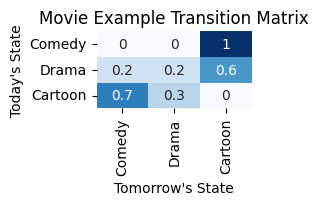

In [ ]:
import numpy as np

# Define the states and transition matrix
states = ["Comedy", "Drama", "Cartoon"]
transition_matrix = [
    # Comedy, Drama, Cartoon
    [0.0, 0.0, 1.0],  # Comedy
    [0.2, 0.2, 0.6],  # Drama
    [0.7, 0.3, 0.0]   # Cartoon
]

def next_state(current_state_idx, transition_matrix):
    """
    Determines the next state index based on current state index and transition matrix.
    """
    return np.random.choice(len(states), p=transition_matrix[current_state_idx])

# Start with an initial state, say Drama
current_state_idx = 1  # Index for "Drama"

# Run the Markov chain 100 times
results = [states[current_state_idx]]
for _ in range(99):  # 99 because we already have the starting state
    current_state_idx = next_state(current_state_idx, transition_matrix)
    results.append(states[current_state_idx])

print(results)

# Create a DataFrame for a better table visualization
df = pd.DataFrame(transition_matrix, columns=states, index=states)

# Display as a table
print(df)

# Display as a heatmap
plt.figure(figsize=(2,1))
sns.heatmap(df, annot=True, cmap='Blues', cbar=False)
plt.title('Movie Example Transition Matrix')
plt.ylabel('Today\'s State')
plt.xlabel('Tomorrow\'s State')
plt.show()


      S     I     R
S  0.78  0.23  0.00
I  0.00  0.66  0.34
R  0.00  0.00  1.00


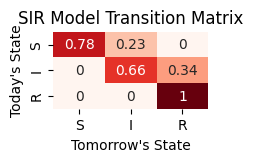

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the states and transition matrix as before
states = ["S", "I", "R"]
transition_matrix = [
    # Comedy, Drama, Cartoon
    [.78, .230, 0.0],  # Comedy
    [0.0, 0.66, 0.34],  # Drama
    [0.0, 0.0, 1]   # Cartoon
]

# Create a DataFrame for a better table visualization
df = pd.DataFrame(transition_matrix, columns=states, index=states)

# Display as a table
print(df)

# Display as a heatmap
plt.figure(figsize=(2,1))
sns.heatmap(df, annot=True, cmap='Reds', cbar=False)
plt.title('SIR Model Transition Matrix')
plt.ylabel('Today\'s State')
plt.xlabel('Tomorrow\'s State')
plt.show()


# Population Processing Code

In [ ]:
import math   # The math library is used for mathematical functions
import random # Random is used to generate random numbers
import time   # Time is used to seed the random number generator.

"""     Constants and Global Variables:
This section defines constants (MASTER and Max)
        and declares global variables
 (x, y, Scount, Icount, Rcount, and Population)
        which are used throughout the program.     """

MASTER = 0
Max = 100

x, y = 0, 0
Scount, Icount, Rcount = 0, 0, 0

Population = [['' for _ in range(Max)] for _ in range(Max)]

def initPopGrid(pop):
    global x, y
    dbPop = float(pop)
    popRoot = math.sqrt(dbPop)
    x = math.ceil(popRoot)
    y = math.ceil(popRoot)

    # initialize people
    for i in range(x):
        for j in range(y):
            random.seed(time.time())
            randNum = random.randint(1, 3)

            if randNum == 1:
                Population[i][j] = 'S'
            elif randNum == 2:
                Population[i][j] = 'I'
            elif randNum == 3:
                Population[i][j] = 'R'

"""     Function calculate:
This function simulates the spread of the disease
 over a given number of days using the SEIR model.
It uses the infection rate and recovery rate to update the population's state
and prints the fractions of the population in each state for each day.       """

def calculate(days, population):
    dt = 1          # time step in days
    beta = 1 / 5    # infection rate
    gamma = 1 / 14  # recovery rate

    S = [0]*Scount
    I = [0]*Icount
    R = [0]*Rcount

    I[0] = Icount/population         # initial infective population
    S[0] = Scount/population - I[0]  # initial susceptible population
    R[0] = Rcount/population         # initial recovered population

    # print initials
    print(f"Fraction of population susceptible to infection at beginning of observation : {S[0]}")
    print(f"Fraction of population infected at beginning of observation : {I[0]}")
    print(f"Fraction of population recovered at beginning of observation : {R[0]}")

    for i in range(days):
        S[i+1] = S[i] - beta * (S[i] * I[i]) * dt
        I[i+1] = I[i] + (beta * S[i] * I[i] - gamma * I[i]) * dt
        R[i+1] = R[i] + gamma * I[i] * dt

        # print values
        print(f"Fraction of population susceptible to infection at day {i+1}: {S[i]}")
        print(f"Fraction of population infected at day {i+1}: {I[i]}")
        print(f"Fraction of population recovered at day {i+1}: {R[i]}")

"""
**Function main:**
This is the main function which is the entry point of the program.
It's a simplified version of the main function from the original C code.

*   It begins by checking the number of tasks.
If it's less than 2 or greater than 10, it prints an error message and exits.

*   Next, it asks for user input for the population size and number of days.

*   It initializes the population grid, and divides the population among the tasks.

*   If the task is the master task, it prints out a bunch of predetermined values
(which doesn't seem to serve any real purpose),
sends population portions to worker tasks and receives processed portions back,
then runs the calculate function.

*   If the task is not the master task, it receives a portion of the population,
counts the number of 'S', 'I', and 'R' states in its portion,
then sends this data back to the master task.

"""

def main():
    global Scount, Icount, Rcount
    numtasks = 2  # we set this to 2 as a default but in MPI this would be determined by the system

    if numtasks < 2:
        print(f"ERROR: Number of tasks set to {numtasks}")
        print("Need at least 2 tasks! Quitting...")
        return

    if numtasks > 10:
        print(f"ERROR: Number of tasks set to {numtasks}")
        print("Number of tasks must be below 10. Quitting...")
        return

    popPortion = ['']*x*y

    if MASTER == 0:
        population = int(input("Enter a population size between 4 and 100"))


# Fixed Infection Code

In [ ]:
"""  This Python script simulates the SEIR (Susceptible, Exposed, Infectious,
Recovered) model for the spread of a disease in a population.
Converted from 4330 Project by Andrew Becker, et al."""

import math
import random

"""**Initialize Parameters:**
The code first sets up some initial counts for the number of Susceptible (Scount),
Infected (Icount), and Recovered (Rcount) individuals in the population.

It also creates a 2D array, Population, to represent a grid of individuals in the population."
"""
Scount = 480
Icount = 326
Rcount = 194
Population = [[0 for _ in range(100)] for _ in range(100)]

"""
initPopGrid(pop): This function initializes the Population grid.
For each individual in the population, it randomly assigns them a state of
being either Susceptible (1), Infected (2), or Recovered (3).
"""

def initPopGrid(pop):
    global x, y
    popRoot = math.sqrt(pop)
    x = math.ceil(popRoot)
    y = math.ceil(popRoot)
    #initialize people
    for i in range(x):
        for j in range(y):
            randNum = random.randint(1, 3)
            Population[i][j] = randNum

""" doWork(x, y): This function goes through the Population grid and updates the counts for the number of
Susceptible, Infected, and Recovered individuals based on the current states in the grid. """
def doWork(x, y):
    global Scount, Icount, Rcount
    Scount = 0
    Icount = 0
    Rcount = 0
    for i in range(x):
        for j in range(y):
            if Population[i][j] == 1:  #1 stands for Susceptible
                Scount += 1
            elif Population[i][j] == 2:  #2 stands for Infected
                Icount += 1
            else:
                Rcount += 1  #else Recovered

"""calculate(days, population): This function simulates the spread of the disease over a given number of days,
based on the initial counts of Susceptible, Infected, and Recovered individuals,
and the defined infection rate (beta) and recovery rate (gamma).
It prints the fraction of the population that is Susceptible, Infected, and Recovered at each day of the simulation.
"""


def calculate(days, population):
    dt = 1.0  #time step in days
    beta = 0.2  #infection rate
    gamma = 0.07  #recovery rate

    S = [0]*480
    I = [0]*326
    R = [0]*194

    I[0] = Icount / population  #initial infective population
    S[0] = Scount / population - I[0]  #initial susceptible population
    R[0] = Rcount / population  #initial recovered population

    #print initials
    print("Fraction of population susceptible to infection at beginning of observation:", S[0])
    print("Fraction of population infected at beginning of observation:", I[0])
    print("Fraction of population recovered at beginning of observation:", R[0])

    for i in range(days):
        S[i + 1] = S[i] - beta * (S[i] * I[i]) * dt
        I[i + 1] = I[i] + (beta * S[i] * I[i] - gamma * I[i]) * dt
        R[i + 1] = R[i] + gamma * I[i] * dt

        #print values
        print("Fraction of population susceptible to infection at day", i, ":", S[i])
        print("Fraction of population infected at day", i, ":", I[i])
        print("Fraction of population recovered at day", i, ":", R[i])

""" main(): This is the main function that runs the simulation.
It defines the total population size and the number of days for the simulation.
Then it initializes the Population grid, calculates the initial counts of
Susceptible, Infected, and Recovered individuals,
and then runs the simulation for the given number of days."""

def main():
    population = 1000
    days = 30
    print("Using population size of 1000")
    print("Over 30 days")

    random.seed()
    initPopGrid(population)
    doWork(x, y)
    calculate(days, population)

if __name__ == '__main__':
    main()
'''
Note: In the SEIR model, the 'Exposed' category often refers to individuals
who have been infected but are not yet infectious themselves.
However, in this particular simulation, there doesn't appear to be an 'Exposed' category;
instead, individuals are modeled as transitioning directly from 'Susceptible' to 'Infected'.
'''

Using population size of 1000
Over 30 days
Fraction of population susceptible to infection at beginning of observation: -0.01599999999999996
Fraction of population infected at beginning of observation: 0.347
Fraction of population recovered at beginning of observation: 0.346
Fraction of population susceptible to infection at day 0 : -0.01599999999999996
Fraction of population infected at day 0 : 0.347
Fraction of population recovered at day 0 : 0.346
Fraction of population susceptible to infection at day 1 : -0.014889599999999961
Fraction of population infected at day 1 : 0.3215996
Fraction of population recovered at day 1 : 0.37028999999999995
Fraction of population susceptible to infection at day 2 : -0.013931902119167963
Fraction of population infected at day 2 : 0.298129930119168
Fraction of population recovered at day 2 : 0.39280197199999994
Fraction of population susceptible to infection at day 3 : -0.013101198718125037
Fraction of population infected at day 3 : 0.276430131609783

"\nNote: In the SEIR model, the 'Exposed' category often refers to individuals \nwho have been infected but are not yet infectious themselves. \nHowever, in this particular simulation, there doesn't appear to be an 'Exposed' category; \ninstead, individuals are modeled as transitioning directly from 'Susceptible' to 'Infected'.\n"

# Corrupted Blood

We convert that Corrupted Blood data into Python, using the Runge-Kutta 4th order method (RK4) to solve the system of differential equations:

In [ ]:
import numpy as np

# Parameters
STARTTIME = 0
STOPTIME = 120
DT = 0.02
N0 = 1000  # initial population size
I0 = 100  # initial infected individuals
Rnull = 0  # initial recovered individuals
p = 1  # transmission probability
c = 2  # time step
delta = 1/(6*60)  # mean duration of immunity
sigma = 1/4  # recovery rate
beta = p*c  # force of transmission

# Function to calculate derivatives
def derivatives(state, t):
    S, I, G = state
    N = S + I + G
    dSdt = delta*G - beta*S*I/N
    dIdt = beta*S*I/N - sigma*I
    dGdt = sigma*I - delta*G
    return np.array([dSdt, dIdt, dGdt])  # Return as numpy array

# Runge-Kutta 4th order method
def rk4(y, time, dt, derivs):
    k1 = derivs(y, time)
    k2 = derivs(y + k1*dt/2.0, time + dt/2.0)
    k3 = derivs(y + k2*dt/2.0, time + dt/2.0)
    k4 = derivs(y + k3*dt, time + dt)
    y_next = y + (k1 + 2*k2 + 2*k3 + k4)*dt/6.0
    return y_next

# Initial conditions
state = np.array([N0 - I0 - Rnull, I0, Rnull])  # Ensure initial state is numpy array

# Time grid
time = np.arange(STARTTIME, STOPTIME, DT)

# Store solution
solution = []
solution.append(state)

# Solve system of ODEs
for t in time[1:]:
    state = rk4(state, t, DT, derivatives)
    solution.append(state)

# Convert to array and compute prevalence
solution = np.array(solution)
N = np.sum(solution, axis=1)
prevalence = solution[:,1]/N*100

# Print prevalence
print("Prevalence:", prevalence)

Prevalence: [10.         10.31410568 10.63650408 ...  3.31767096  3.31796566
  3.31824419]


In [ ]:
import numpy as np

# Parameters
STARTTIME = 0
STOPTIME = 120
DT = 0.02
N0 = 1000  # initial population size
I0 = 100  # initial infected individuals
Rnull = 0  # initial recovered individuals
p = 1  # transmission probability
c = 2  # time step
delta = 1/(6*60)  # mean duration of immunity
sigma = 1/4  # recovery rate
beta = p*c  # force of transmission

# Function to calculate derivatives
def derivatives(state, t):
    S, I, G = state
    N = S + I + G
    dSdt = delta*G - beta*S*I/N
    dIdt = beta*S*I/N - sigma*I
    dGdt = sigma*I - delta*G
    return np.array([dSdt, dIdt, dGdt])  # Return as numpy array

# Runge-Kutta 4th order method
def rk4(y, time, dt, derivs):
    k1 = derivs(y, time)
    k2 = derivs(y + k1*dt/2.0, time + dt/2.0)
    k3 = derivs(y + k2*dt/2.0, time + dt/2.0)
    k4 = derivs(y + k3*dt, time + dt)
    y_next = y + (k1 + 2*k2 + 2*k3 + k4)*dt/6.0
    return y_next

# Initial conditions
state = np.array([N0 - I0 - Rnull, I0, Rnull])  # Ensure initial state is numpy array

# Time grid
time = np.arange(STARTTIME, STOPTIME, DT)

# Store solution
solution = []
solution.append(state)

# Solve system of ODEs
for t in time[1:]:
    state = rk4(state, t, DT, derivatives)
    solution.append(state)

# Convert to array and compute prevalence
solution = np.array(solution)
N = np.sum(solution, axis=1)
prevalence = solution[:,1]/N*100

# Print prevalence
print("Prevalence:", prevalence)

Prevalence: [10.         10.31410568 10.63650408 ...  3.31767096  3.31796566
  3.31824419]


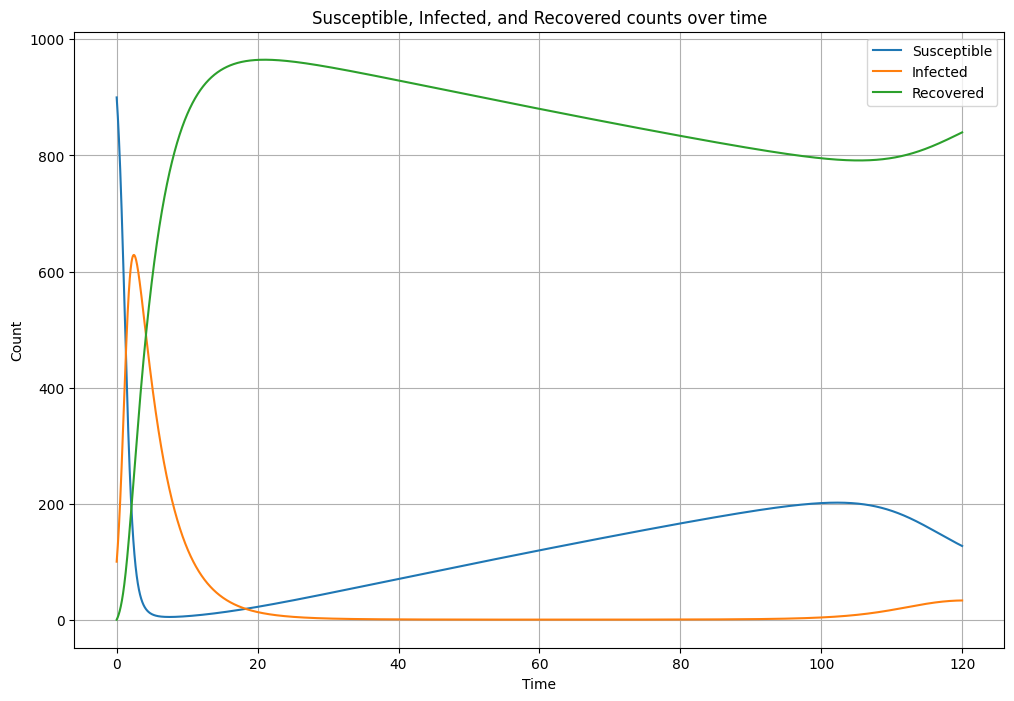

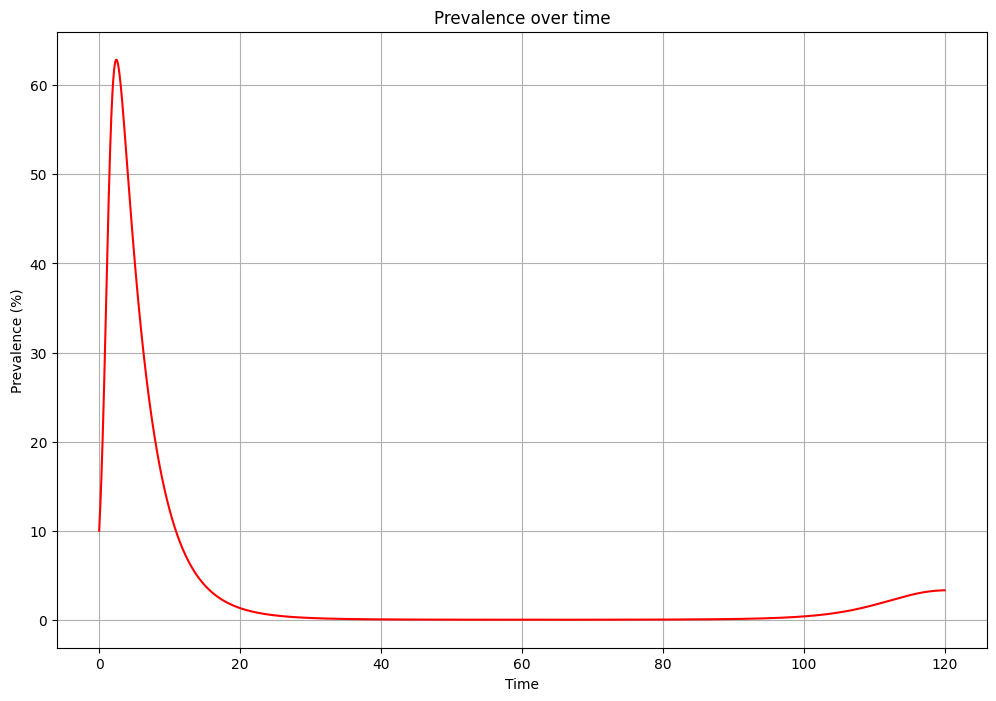

In [ ]:
import matplotlib.pyplot as plt

# Extract Susceptible, Infected, and Graveyard counts from solution
S = solution[:, 0]
I = solution[:, 1]
G = solution[:, 2]

# Plot Susceptible, Infected, and Graveyard counts over time
plt.figure(figsize=(12, 8))
plt.plot(time, S, label='Susceptible')
plt.plot(time, I, label='Infected')
plt.plot(time, G, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.title('Susceptible, Infected, and Recovered counts over time')
plt.grid(True)
plt.show()

# Plot Prevalence over time
plt.figure(figsize=(12, 8))
plt.plot(time, prevalence, label='Prevalence', color='red')
plt.xlabel('Time')
plt.ylabel('Prevalence (%)')
plt.title('Prevalence over time')
plt.grid(True)
plt.show()


# Cellular Automata (GPT-Assist)

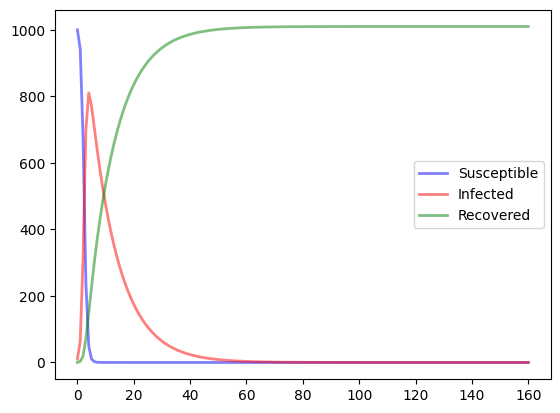

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the SIR model differential equations.
def sir_model(y, t, b, a):
    S, I, R = y
    dSdt = -b * S * I
    dIdt = b * S * I - a * I
    dRdt = a * I
    return [dSdt, dIdt, dRdt]

# Set initial conditions based on the Corrupted Blood Virus incident.
# You'll need to adjust these based on what you know about the incident.
initial_S = 1000  # Initial susceptible population
initial_I = 10    # Initial infected individuals
initial_R = 0     # Initial recovered individuals

# Set the infection rate (b) and recovery rate (a) based on scientific studies or assumptions.
b = 0.002
a = 0.1

# Integrate the SIR equations over the time grid using odeint.
t = np.linspace(0, 160, 160) # 160 days
result = odeint(sir_model, [initial_S, initial_I, initial_R], t, args=(b, a))

# Plot the data on three separate curves for S(t), I(t), and R(t).
S, I, R = result.T
fig, ax = plt.subplots()
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
plt.legend()

# Surreal Number

Surreal numbers are a mathematical concept that extends the real numbers and include infinitesimals and infinite numbers. They are defined by recursive construction using pairs of sets called left and right sets. Python does not natively support surreal numbers, but you can implement a basic class for handling them.

Here's a simple Python implementation of surreal numbers with an add method to add two surreal numbers:

In [ ]:
class Surreal: # Surreal Addition, Generated by GPT-3 with help from Donald Knuth's Surreal Numbers and Conway/Guy's explanation
    def __init__(self, left=None, right=None):
        self.left = left if left is not None else []
        self.right = right if right is not None else []

    def __repr__(self):
        return f"Surreal({self.left}, {self.right})"

    def add(self, other):
        new_left = [a.add(other) for a in self.left] + [self.add(b) for b in other.left]
        new_right = [a.add(other) for a in self.right] + [self.add(b) for b in other.right]
        return Surreal(new_left, new_right)

    @staticmethod
    def from_int(n):
        if n == 0:
            return Surreal([], [])
        elif n > 0:
            return Surreal([Surreal.from_int(n - 1)], [])
        else:
            return Surreal([], [Surreal.from_int(n + 1)])

def main():
    surreal1 = Surreal.from_int(3)
    surreal2 = Surreal.from_int(-2)

    surreal_sum = surreal1.add(surreal2)
    print("Surreal1:", surreal1)
    print("Surreal2:", surreal2)
    print("Surreal1 + Surreal2:", surreal_sum)

if __name__ == "__main__":
    main()


Surreal1: Surreal([Surreal([Surreal([Surreal([], [])], [])], [])], [])
Surreal2: Surreal([], [Surreal([], [Surreal([], [])])])
Surreal1 + Surreal2: Surreal([Surreal([Surreal([Surreal([], [Surreal([], [Surreal([], [])])])], [Surreal([Surreal([], [Surreal([], [])])], [Surreal([Surreal([], [])], [])])])], [Surreal([Surreal([Surreal([], [Surreal([], [])])], [Surreal([Surreal([], [])], [])])], [Surreal([Surreal([Surreal([], [])], [])], [])])])], [Surreal([Surreal([Surreal([Surreal([], [Surreal([], [])])], [Surreal([Surreal([], [])], [])])], [Surreal([Surreal([Surreal([], [])], [])], [])])], [Surreal([Surreal([Surreal([Surreal([], [])], [])], [])], [])])])
